
# Assignment-1: Wine Quality Classification (Logistic Regression)

This notebook demonstrates Logistic Regression on the **Wine Quality** dataset.
We will:
1. Load and preprocess the data  
2. Apply Logistic Regression  
3. Evaluate using classification metrics, Confusion Matrix, and ROC curve  


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [ ]:

# Load dataset (make sure the CSV is in the same folder)
data_path = "winequality-red.csv"
df = pd.read_csv(data_path, sep=";")

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

# Binarize target: Good (>=7) vs Not Good (<7)
df['quality_binary'] = (df['quality'] >= 7).astype(int)

X = df.drop(columns=['quality', 'quality_binary'])
y = df['quality_binary']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Class balance:\n", y.value_counts(normalize=True))

Train shape: (1279, 11)
Test shape: (320, 11)
Class balance:
 quality_binary
0    0.86429
1    0.13571
Name: proportion, dtype: float64


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [ ]:

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:

              precision    recall  f1-score   support

           0     0.9091    0.9747    0.9408       277
           1     0.6957    0.3721    0.4848        43

    accuracy                         0.8938       320
   macro avg     0.8024    0.6734    0.7128       320
weighted avg     0.8804    0.8938    0.8795       320



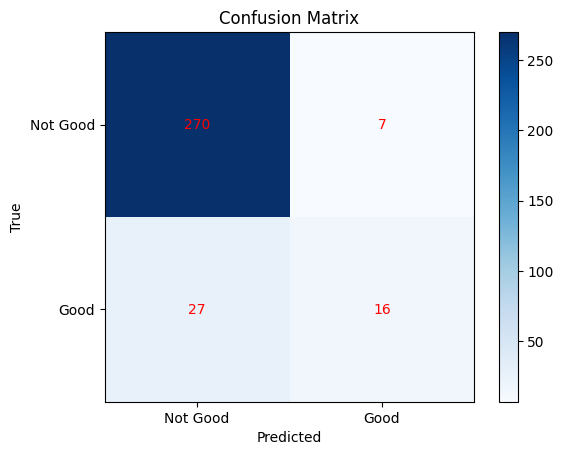

In [ ]:

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap="Blues")

ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(["Not Good","Good"])
ax.set_yticklabels(["Not Good","Good"])
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
plt.title("Confusion Matrix")

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val}", ha="center", va="center", color="red")

plt.colorbar(im)
plt.show()


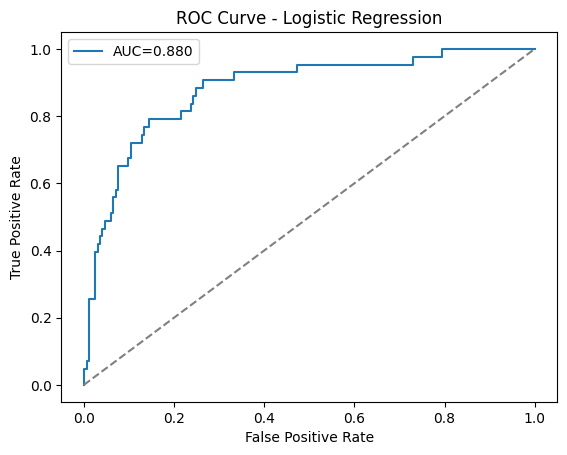

In [ ]:

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
